In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import scipy as sp
import scipy.stats as stats
from sklearn.preprocessing import *

In [ ]:
"""
이상치, 특이값 처리

1. "이상치, 특이값을 찾아서 제거"한 후 표준정규분포로 
    표준화 변환을 해서 분석, 모델링을 진행하는 방법
    
2. "이상치, 특이값에 덜 민감한" 중앙값(median)과 
    IQR(Inter-Quartile Range)을 이용해서 척도를 표준화하는 방법.  
    K-NN 같은 non-parametric modeling은 두번째 방법도 사용 가능.
    
Python 의 sklearn.preprocessing의

(1) StandardScaler() method를 이용한 표준정규분포로의 표준화 (x-mean)/std 

(2) RobustScaler() method를 이용한 표준화 (x-median)/IQR




"""

In [3]:
# setting the number of digits of precision for floating point output
# 소수점 2자리까지만 
np.set_printoptions(precision=2)

# setting random seed number : 난수 고정
np.random.seed(10)

# making 100 random data ~ N(10, 2)
mu, sigma = 10, 2
x = mu + sigma * np.random.randn(100)
x

array([ 12.66,  11.43,   6.91,   9.98,  11.24,   8.56,  10.53,  10.22,
        10.01,   9.65,  10.87,  12.41,   8.07,  12.06,  10.46,  10.89,
         7.73,  10.27,  12.97,   7.84,   6.04,   6.51,  10.53,  14.77,
        12.25,  13.35,  10.2 ,  12.8 ,   9.46,  11.23,   9.47,   8.9 ,
        10.27,   9.05,  12.62,  10.39,  10.8 ,   9.32,  12.51,   8.54,
        11.32,   9.3 ,   8.12,   9.02,   8.39,   9.57,   9.32,  10.62,
        11.13,   9.71,   9.95,  10.58,   8.92,  11.42,  11.68,  10.41,
        14.79,  11.83,   9.78,   9.28,   9.54,   9.  ,  12.26,   8.6 ,
         9.84,   8.94,  12.09,   7.16,   9.28,   9.76,  10.64,  10.92,
         9.57,  11.98,  10.63,  14.94,   6.98,  11.24,   7.91,   8.4 ,
        13.97,  13.49,   6.29,   9.55,   9.87,   5.74,   9.9 ,  10.79,
        10.43,   6.01,  12.22,  10.49,   9.88,   8.49,  11.42,  11.84,
         9.04,  10.18,  11.65,   6.09])

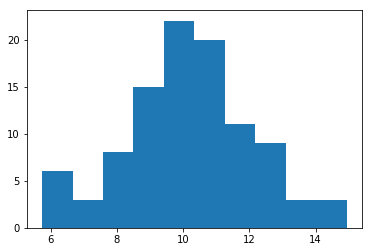

In [4]:
# plotting histogram
plt.hist(x)
plt.show()

In [4]:
# checking mean, std
print(x.mean())
print(x.std())

10.1588333259
1.93407895423


In [6]:
# inserting outliers : 이상치 넣기
x[98:100] = 100
x

array([  12.66,   11.43,    6.91,    9.98,   11.24,    8.56,   10.53,
         10.22,   10.01,    9.65,   10.87,   12.41,    8.07,   12.06,
         10.46,   10.89,    7.73,   10.27,   12.97,    7.84,    6.04,
          6.51,   10.53,   14.77,   12.25,   13.35,   10.2 ,   12.8 ,
          9.46,   11.23,    9.47,    8.9 ,   10.27,    9.05,   12.62,
         10.39,   10.8 ,    9.32,   12.51,    8.54,   11.32,    9.3 ,
          8.12,    9.02,    8.39,    9.57,    9.32,   10.62,   11.13,
          9.71,    9.95,   10.58,    8.92,   11.42,   11.68,   10.41,
         14.79,   11.83,    9.78,    9.28,    9.54,    9.  ,   12.26,
          8.6 ,    9.84,    8.94,   12.09,    7.16,    9.28,    9.76,
         10.64,   10.92,    9.57,   11.98,   10.63,   14.94,    6.98,
         11.24,    7.91,    8.4 ,   13.97,   13.49,    6.29,    9.55,
          9.87,    5.74,    9.9 ,   10.79,   10.43,    6.01,   12.22,
         10.49,    9.88,    8.49,   11.42,   11.84,    9.04,   10.18,
        100.  ,  100

In [7]:
# checking change of mean, std 
print(x.mean())
print(x.std())
# 표준편차가 상당히 증가됨

11.9813835958
12.714552556


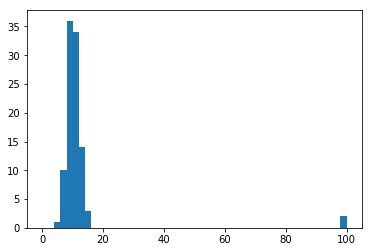

In [8]:
# plotting histogram to check outliers
plt.hist(x, bins=np.arange(0, 102, 2))
plt.show()

In [9]:
# 이상치가 포함된 데이터의 표준정규분포로의 표준화 
# sklearn.preprocessing.StandardScaler()
x_stand = StandardScaler().fit_transform(x)
x_stand
# 6.92e+00,   6.92e+00 : 이상치

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([  5.36e-02,  -4.33e-02,  -3.99e-01,  -1.57e-01,  -5.81e-02,
        -2.69e-01,  -1.14e-01,  -1.39e-01,  -1.55e-01,  -1.83e-01,
        -8.77e-02,   3.34e-02,  -3.08e-01,   5.91e-03,  -1.20e-01,
        -8.58e-02,  -3.35e-01,  -1.35e-01,   7.77e-02,  -3.26e-01,
        -4.67e-01,  -4.30e-01,  -1.14e-01,   2.19e-01,   2.09e-02,
         1.07e-01,  -1.40e-01,   6.41e-02,  -1.99e-01,  -5.94e-02,
        -1.98e-01,  -2.42e-01,  -1.35e-01,  -2.31e-01,   5.00e-02,
        -1.25e-01,  -9.29e-02,  -2.09e-01,   4.18e-02,  -2.71e-01,
        -5.20e-02,  -2.11e-01,  -3.04e-01,  -2.33e-01,  -2.82e-01,
        -1.89e-01,  -2.09e-01,  -1.07e-01,  -6.69e-02,  -1.79e-01,
        -1.60e-01,  -1.10e-01,  -2.41e-01,  -4.44e-02,  -2.34e-02,
        -1.24e-01,   2.21e-01,  -1.15e-02,  -1.73e-01,  -2.13e-01,
        -1.92e-01,  -2.35e-01,   2.17e-02,  -2.66e-01,  -1.69e-01,
        -2.39e-01,   8.73e-03,  -3.79e-01,  -2.13e-01,  -1.75e-01,
        -1.06e-01,  -8.33e-02,  -1.90e-01,  -2.55e-04,  -1.06e

In [10]:
# checking mean, std : Z~N(0, 1)
print(x_stand.mean())
print(x_stand.std())

5.3290705182e-17
1.0


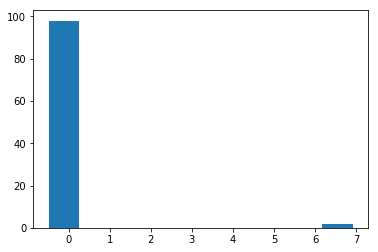

In [11]:
# plotting histogram
plt.hist(x_stand)
plt.show()

98


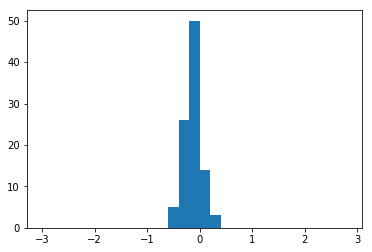

In [12]:
# 이상치 제거한 후 확인
x_stand_zoom = x_stand[x_stand < 5]
print(len(x_stand_zoom)) # 이상치 제거한 98개
plt.hist(x_stand_zoom, bins=np.arange(-3, 3, 0.2))
plt.show()

(0.9873930215835571, 0.479479044675827)


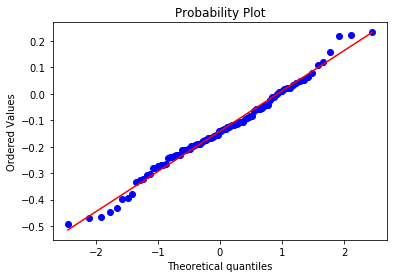

In [43]:
# normality-test(shapiro wilk)
print(stats.shapiro(x_stand_zoom))
# 귀무가설을 채택하여 정규성을 만족한다고 볼 수 있다.


# plotting qq plot(probplot)
stats.probplot(x_stand_zoom, plot=plt)
plt.show()

In [ ]:
"""
범위를 -3 ~ 3 까지 하고 hist를 plotting 했을 때, 
StandardScaler()에 의한 표준화는 이상치에 영향을 심하게 받아서 값들이
촘촘하게 서로 붙어있다. 
"""


In [23]:
# 이상치가 포함된 데이터의 중앙값과 IQR 를 이용한 표준화
# sklearn.preprocessing.RobustScaler()
print(x)





[  12.66   11.43    6.91    9.98   11.24    8.56   10.53   10.22   10.01
    9.65   10.87   12.41    8.07   12.06   10.46   10.89    7.73   10.27
   12.97    7.84    6.04    6.51   10.53   14.77   12.25   13.35   10.2
   12.8     9.46   11.23    9.47    8.9    10.27    9.05   12.62   10.39
   10.8     9.32   12.51    8.54   11.32    9.3     8.12    9.02    8.39
    9.57    9.32   10.62   11.13    9.71    9.95   10.58    8.92   11.42
   11.68   10.41   14.79   11.83    9.78    9.28    9.54    9.     12.26
    8.6     9.84    8.94   12.09    7.16    9.28    9.76   10.64   10.92
    9.57   11.98   10.63   14.94    6.98   11.24    7.91    8.4    13.97
   13.49    6.29    9.55    9.87    5.74    9.9    10.79   10.43    6.01
   12.22   10.49    9.88    8.49   11.42   11.84    9.04   10.18  100.
  100.  ]


In [13]:
# checking statistics (using pandas.series.describe) 
s = pd.Series(x)
s.describe()

count    100.000000
mean      11.981384
std       12.778606
min        5.736576
25%        9.044740
50%       10.207698
75%       11.418220
max      100.000000
dtype: float64

In [20]:
# median
print(np.median(x))
# Q1 (25%)
q1 = np.percentile(x, 25, axis=0)
print(q1)
# Q3 (75%)
q3 = np.percentile(x, 75)
print(q3)
# IQR = Q3 - Q1
iqr = q3 - q1
print(iqr)

10.2076977416
9.04474040819
11.4182195381
2.37347912996


In [27]:
# .sklearn.preprocesssing.RobustScaler()
x_robust = RobustScaler().fit_transform(x)
# 마지막 10번째 값들 확인
x_robust[-10:]

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:986: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:1008: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:986: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fe

array([  8.46e-01,   1.19e-01,  -1.40e-01,  -7.23e-01,   5.12e-01,
         6.86e-01,  -4.94e-01,  -1.20e-02,   3.78e+01,   3.78e+01])

In [32]:
# RobustScaler() removes the median and scales the data 
# according to IQR(Inerquartile Range)
print(np.median(x_robust))
print(np.std(x_robust))
print(np.mean(x_robust))

0.0
5.35692620824
0.747293638222


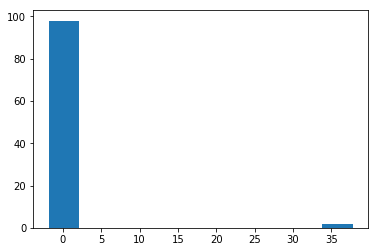

In [44]:
# plotting histogram
plt.hist(x_robust)
plt.show()

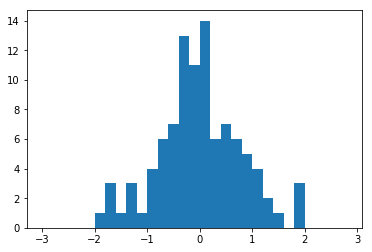

In [46]:
# 이상치 제거 후 다시 확인
x_robust_zoom = x_robust[x_robust < 5]
plt.hist(x_robust_zoom, bins=np.arange(-3, 3, 0.2))
plt.show()

(0.9873932003974915, 0.47949546575546265)


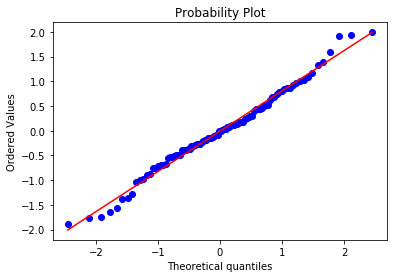

In [48]:
# normality test (shapiro wilk)
print(stats.shapiro(x_robust_zoom))

# plotting qqplot(probplot)
stats.probplot(x_robust_zoom, plot=plt)
plt.show()

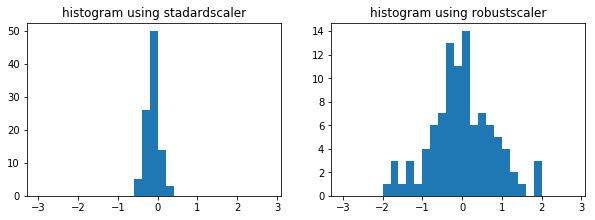

In [52]:
plt.figure(figsize=(10, 7))
plt.subplot(221)
plt.hist(x_stand_zoom, bins=np.arange(-3, 3, 0.2))
plt.title("histogram using stadardscaler")
plt.subplot(222)
plt.hist(x_robust_zoom, bins=np.arange(-3, 3, 0.2))
plt.title("histogram using robustscaler")
plt.show()

In [ ]:
"""
두 개의 히스토그램은 이상치, 특이값(outlier)이 포함되어 있는 데이터를 
표준화하는 경우

(1) 평균과 표준편차를 이용한 표준정규분포 표준화 결과 
(outlier 미포함한 범위의 zoom in)

(2) 중앙값과 IQR(Interquartile Range)를 이용한 이상치에 견고한 표준화 
(outlier 미포함한 범위의 zoom in) 결과의 분포

왼쪽의 StandardScaler()에 의한 표준화보다 
오른쪽의 RobustScaler()에 의한 표준화가 
동일한 값을 더 넓게 분포시키고 있음을 알 수 있다.  
즉, 목표변수 y값을 분류나 예측하는데 있어 산포가 더 크기 때문에 
설명변수 x변수로서 더 유용할 수 있다고 추정 가능.



"""